## Análisis Exploratorio de Datos Híbrido Python-R


 Este notebook realiza un análisis exploratorio de datos combinando las capacidades de Python (para manipulación de datos y visualización) y R (para análisis estadístico con ANOVA y algunas visualizaciones específicas).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Carga y limpieza de datos


In [ ]:
df = pd.read_csv('/content/final_test.csv')
# Información general
print(df.info())

# Resumen estadístico
print(df.describe())

# Ver primeros registros
print(df.head())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB
None
              weight            age         height
count  119734.000000  119477.000000  119404.000000
mean       61.756811      34.027311     165.805794
std         9.944863       8.149447       6.737651
min        22.000000       0.000000     137.160000
25%        55.000000      29.000000     160.020000
50%        61.000000      32.000000     165.100000
75%        67.000000      37.000000     170.180000
max       136.000000     117.000000     193.040000
   weight   age  height size
0      62  28.0  172.72   XL
1      59  36.0  167.64    L
2      61  34.0  165.10    M
3      65  27.0  175

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
print(df.isnull().sum())

weight      0
age       257
height    330
size        0
dtype: int64


### Manejo de valores nulos


In [ ]:
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
print(df.isnull().sum())

weight    0
age       0
height    0
size      0
dtype: int64


## Visualizar posibles outliers:
#### Usa gráficos como boxplot para identificar valores extremos:

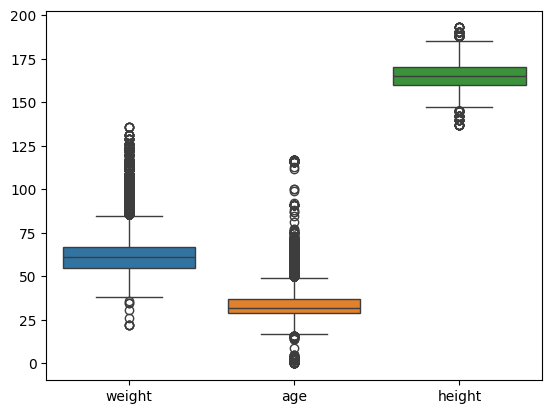

In [ ]:
sns.boxplot(data=df[['weight', 'age', 'height']])
plt.show()

# Manejo de outliers


In [ ]:
Q1 = df[['weight', 'age', 'height']].quantile(0.25)
Q3 = df[['weight', 'age', 'height']].quantile(0.75)
IQR = Q3 - Q1

outliers_mask = ((df[['weight', 'age', 'height']] < (Q1 - 1.5 * IQR)) |
                 (df[['weight', 'age', 'height']] > (Q3 + 1.5 * IQR))).any(axis=1)

if outliers_mask.any():
    df = df[~outliers_mask]
    print("Outliers removidos.")
else:
    print("No se encontraron outliers.")

if df.empty:
    print("Error: El DataFrame está vacío después de la eliminación de valores atípicos. Revise los datos o el método de detección de outliers.")
    exit()

df['weight'] = df['weight'].clip(lower=Q1['weight'] - 1.5 * IQR['weight'], upper=Q3['weight'] + 1.5 * IQR['weight'])
df['age'] = df['age'].clip(lower=Q1['age'] - 1.5 * IQR['age'], upper=Q3['age'] + 1.5 * IQR['age'])
df['height'] = df['height'].clip(lower=Q1['height'] - 1.5 * IQR['height'], upper=Q3['height'] + 1.5 * IQR['height'])


Outliers removidos.


<ipython-input-17-9f0377b4fe46>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['weight'].clip(lower=Q1['weight'] - 1.5 * IQR['weight'], upper=Q3['weight'] + 1.5 * IQR['weight'])
<ipython-input-17-9f0377b4fe46>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].clip(lower=Q1['age'] - 1.5 * IQR['age'], upper=Q3['age'] + 1.5 * IQR['age'])
<ipython-input-17-9f0377b4fe46>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

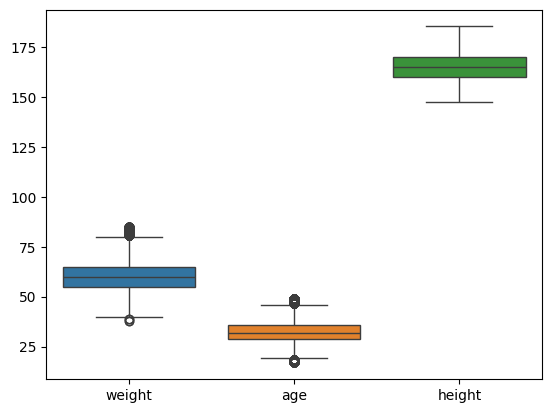

In [ ]:
sns.boxplot(data=df[['weight', 'age', 'height']])
plt.show()

# Label Encoding


In [ ]:
le = LabelEncoder()
df['size'] = le.fit_transform(df['size'])
size_labels = dict(zip(le.classes_, le.transform(le.classes_)))
df['size_label'] = df['size'].map({v: k for k, v in size_labels.items()})
# Información general
print(df.info())

# Resumen estadístico
print(df.describe())

# Ver primeros registros
print(df.head())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 109605 entries, 0 to 119733
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   weight      109605 non-null  int64  
 1   age         109605 non-null  float64
 2   height      109605 non-null  float64
 3   size        109605 non-null  int64  
 4   size_label  109605 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 5.0+ MB
None
              weight            age         height           size
count  109605.000000  109605.000000  109605.000000  109605.000000
mean       60.724775      32.741234     165.694602       2.453638
std         8.113507       6.143880       6.652827       1.989750
min        38.000000      17.000000     147.320000       0.000000
25%        55.000000      29.000000     160.020000       1.000000
50%        60.000000      32.000000     165.100000       2.000000
75%        65.000000      36.000000     170.180000       3.000000
max   

,weight,age,height,size,size_label
0,62,28.0,172.72,3,XL
1,59,36.0,167.64,0,L
2,61,34.0,165.10,1,M
3,65,27.0,175.26,0,L
4,62,45.0,172.72,1,M


### Visualizaciones con Python


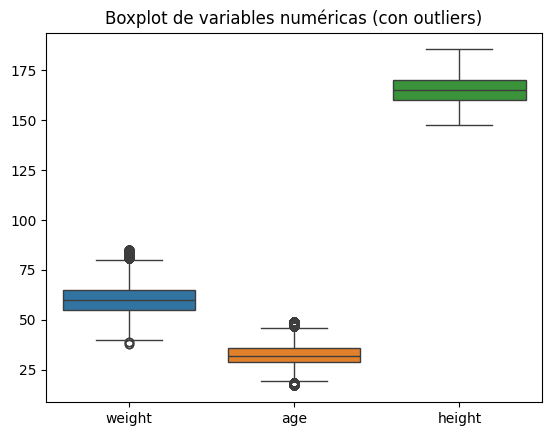

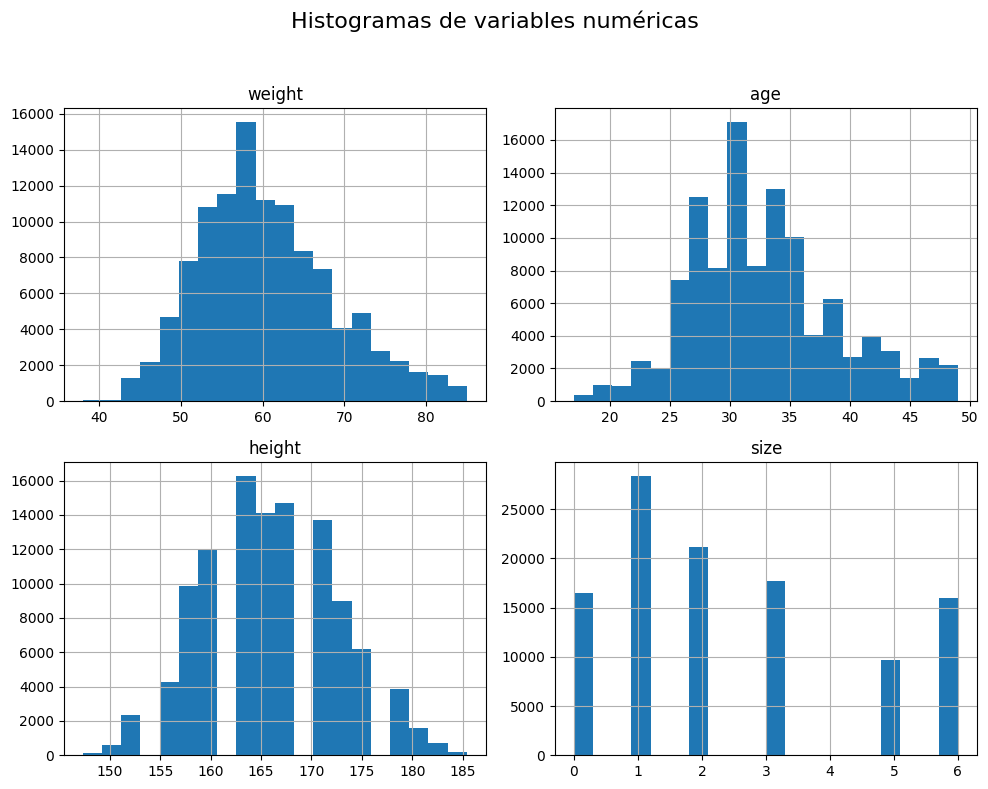

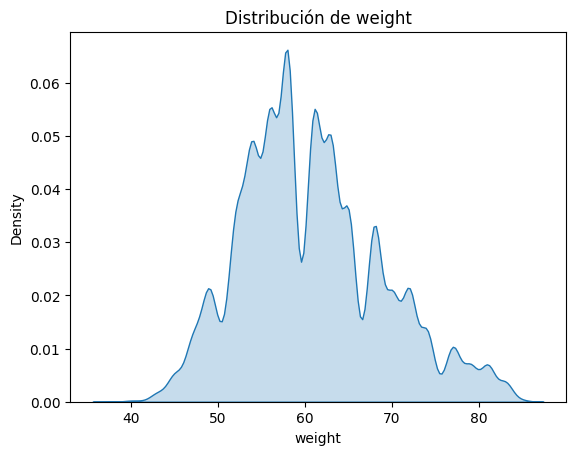

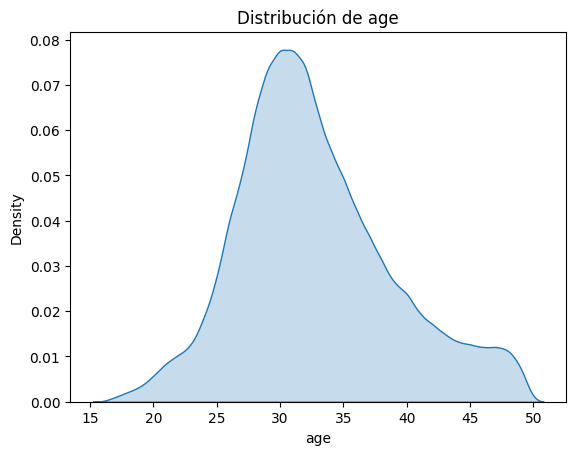

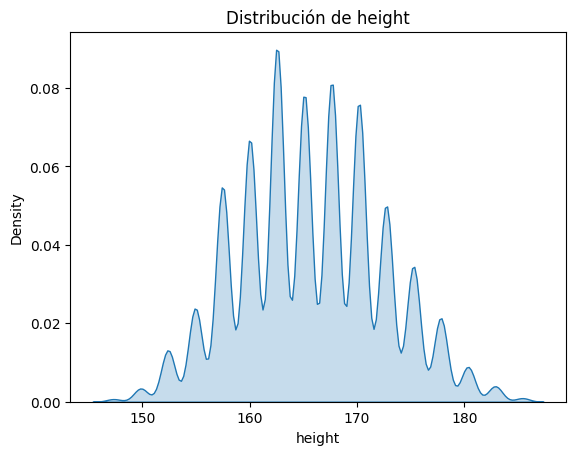

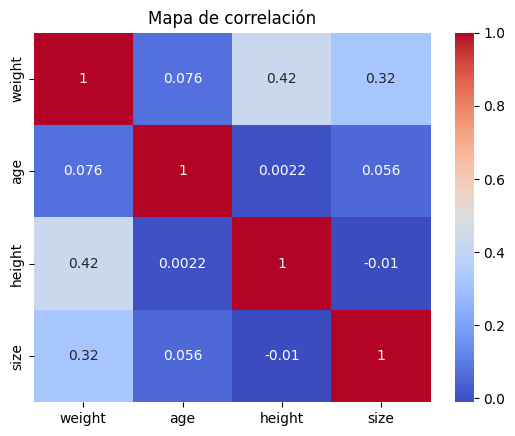

<ipython-input-21-ccb55ed5aba3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='size_label', y=col, palette='pastel')


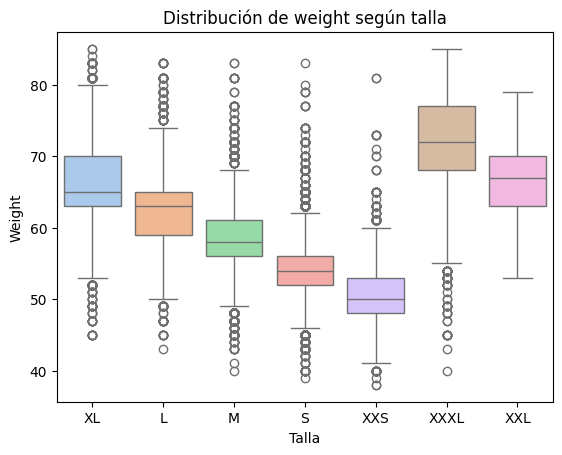

<ipython-input-21-ccb55ed5aba3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='size_label', y=col, palette='pastel')


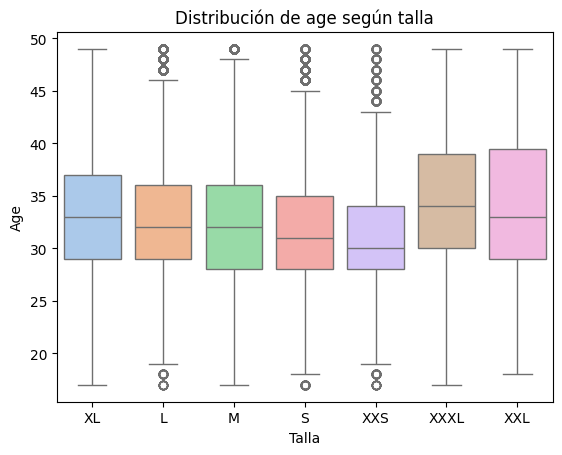

<ipython-input-21-ccb55ed5aba3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='size_label', y=col, palette='pastel')


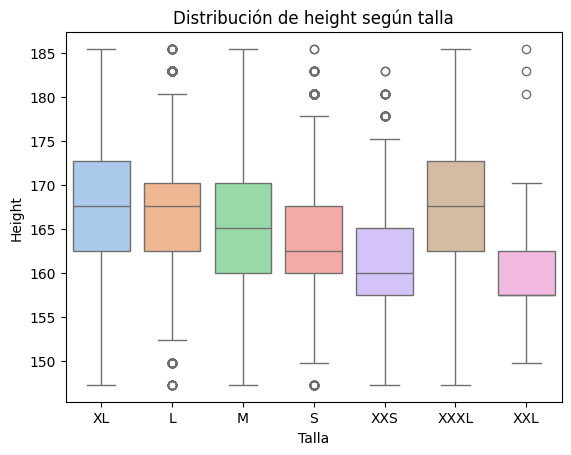

<ipython-input-21-ccb55ed5aba3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='size_label', y=col, palette='muted')


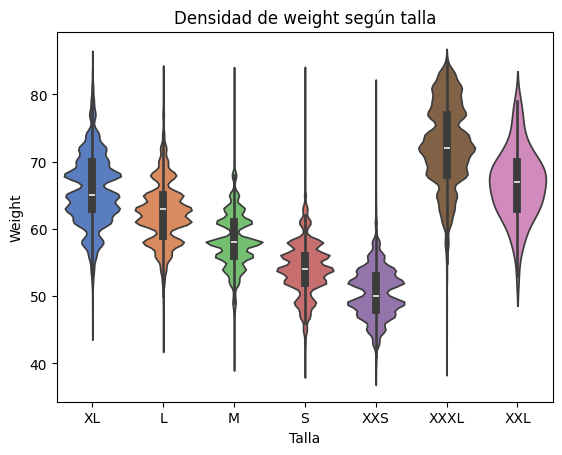

<ipython-input-21-ccb55ed5aba3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='size_label', y=col, palette='muted')


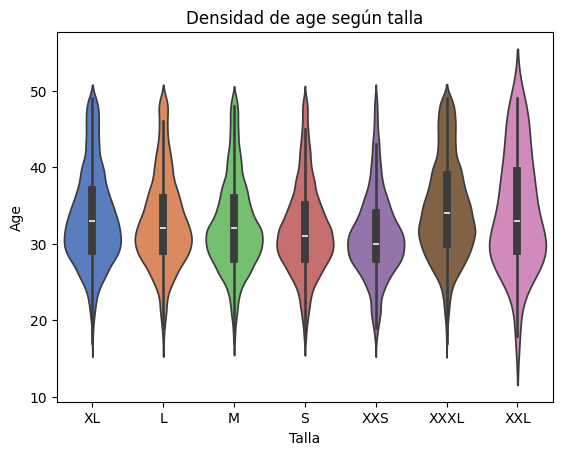

<ipython-input-21-ccb55ed5aba3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='size_label', y=col, palette='muted')


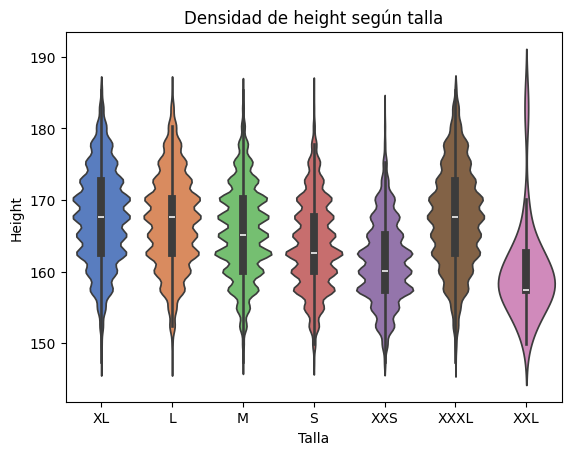

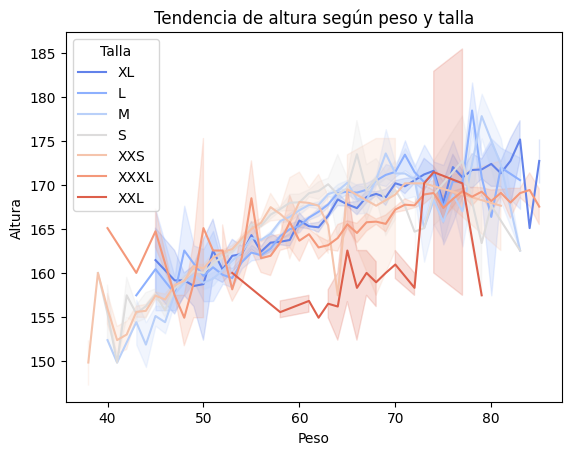

<ipython-input-21-ccb55ed5aba3>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='pastel')


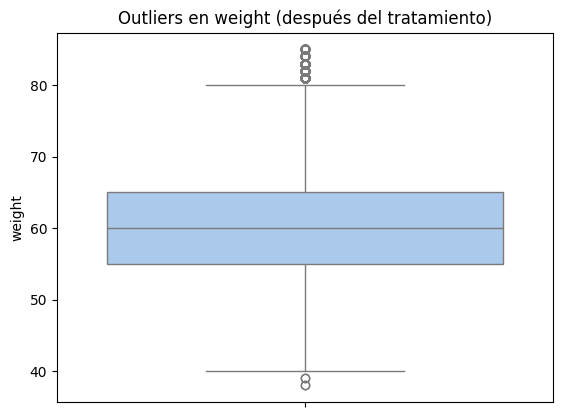

<ipython-input-21-ccb55ed5aba3>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='pastel')


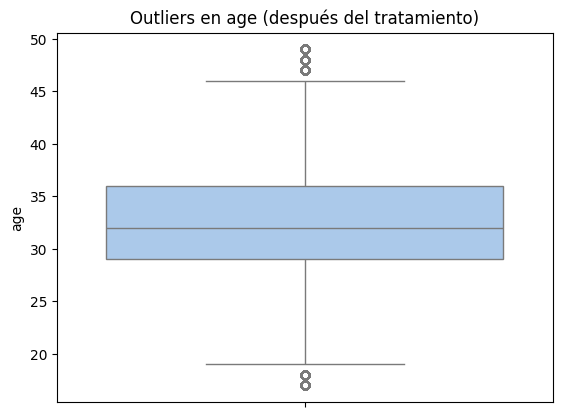

<ipython-input-21-ccb55ed5aba3>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='pastel')


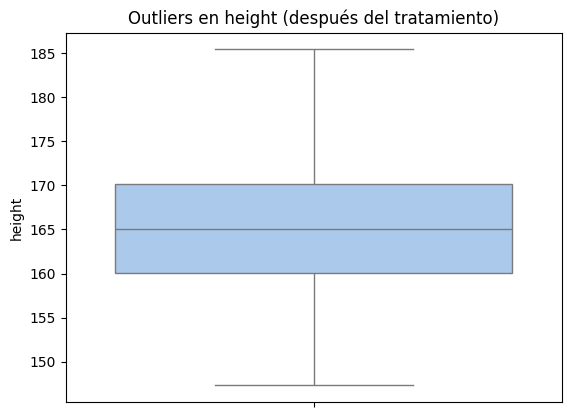

In [ ]:
# %%
df.to_csv("cleaned_final_test.csv", index=False)

sns.boxplot(data=df[['weight', 'age', 'height']])
plt.title('Boxplot de variables numéricas (con outliers)')
plt.show()

# %%
df.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogramas de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# %%
for col in ['weight', 'age', 'height']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# %%
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

# %%
for col in ['weight', 'age', 'height']:
    sns.boxplot(data=df, x='size_label', y=col, palette='pastel')
    plt.title(f'Distribución de {col} según talla')
    plt.xlabel('Talla')
    plt.ylabel(col.capitalize())
    plt.show()

# %%
for col in ['weight', 'age', 'height']:
    sns.violinplot(data=df, x='size_label', y=col, palette='muted')
    plt.title(f'Densidad de {col} según talla')
    plt.xlabel('Talla')
    plt.ylabel(col.capitalize())
    plt.show()

# %%
sns.lineplot(data=df, x='weight', y='height', hue='size_label', palette='coolwarm')
plt.title('Tendencia de altura según peso y talla')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.legend(title='Talla')
plt.show()

# %%
for col in ['weight', 'age', 'height']:
    sns.boxplot(data=df, y=col, palette='pastel')
    plt.title(f'Outliers en {col} (después del tratamiento)')
    plt.show()

## Guardar los datos limpios para R